# Analysis of Gene Expression Variability by Class
This notebook analyzes the variability of genes within classes.

In [1]:
import init
from common import constants as cn
from common.trinary_data import TrinaryData
from common.data_provider import DataProvider
from common_python.plots import util_plots
from plots import util_plots as xutil_plots
from common_python.classifier import classifier_ensemble
from common_python.classifier import util_classifier
from common_python.classifier import classifier_collection
from common_python.classifier.classifier_ensemble_random_forest import ClassifierEnsembleRandomForest
from common_python.plots import util_plots as common_plots

import collections
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import cross_val_score

trinary_short = TrinaryData()
trinary_short.df_X.columns = trinary_short.features
trinary_long = TrinaryData(is_averaged=False, is_dropT1=False)
trinary_long.df_X.columns = trinary_long.features

%matplotlib inline

In [2]:
trinary_long.df_X.head()

,Rv1131,Rv1927,Rv3085,Rv3083,Rv2642,Rv3741c,Rv0841,Rv1129c,Rv3086,Rv0260c,...,Rv3267,Rv0288,Rv0129c,Rv3135,Rv0351,Rv2147c,Rv2737c,Rv0440,Rv3269,Rv3418c
T1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
trinary_long.ser_y.head()

T1.0    0
T1.1    0
T1.2    0
T2.0    1
T2.1    1
Name: name, dtype: int64

## F-Stat by Gene

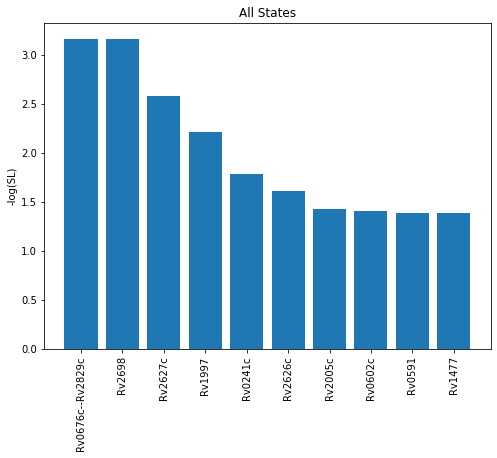

In [4]:
util_classifier.plotStateFstat(None, trinary_long.df_X, trinary_long.ser_y)

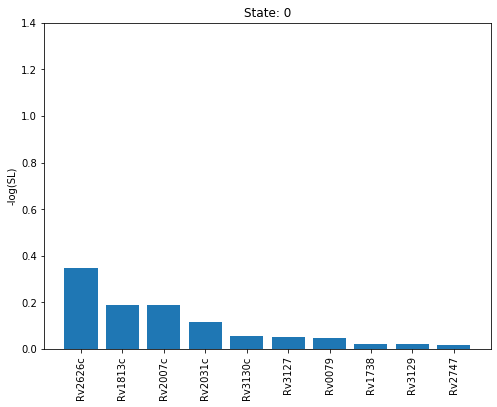

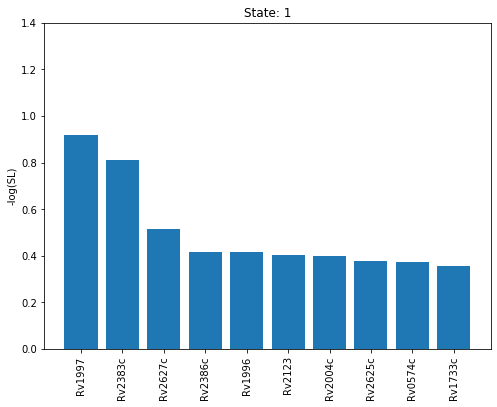

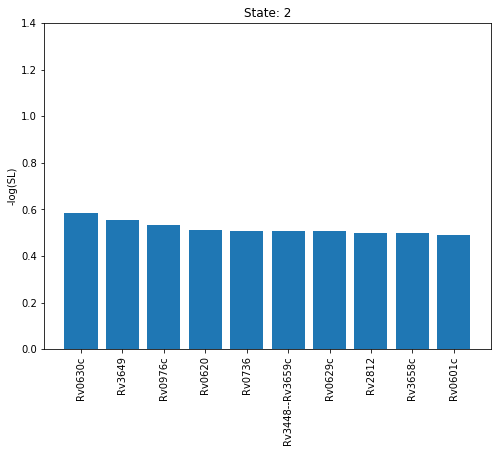

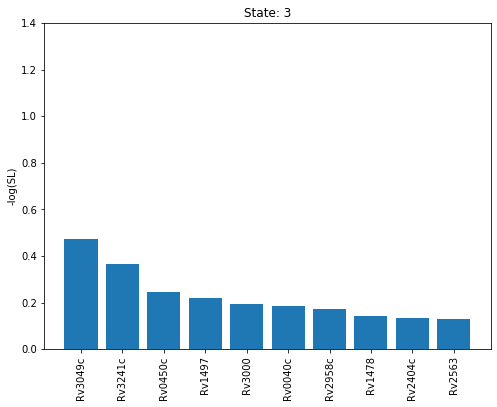

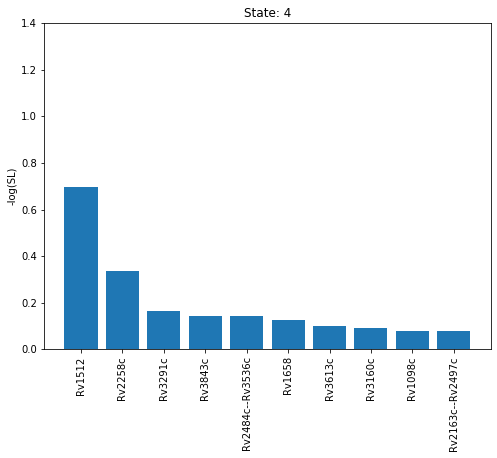

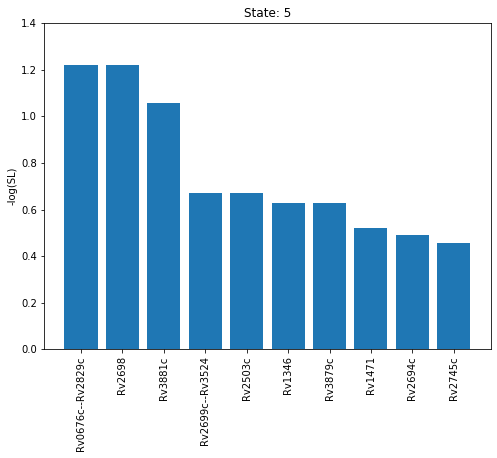

In [5]:
for state in trinary_long.ser_y.unique():
    util_classifier.plotStateFstat(state, trinary_long.df_X, trinary_long.ser_y)

## Comparison of Genes F-Statistics Across State

In [6]:
df = util_classifier.makeFstatDF(trinary_long.df_X, trinary_long.ser_y)

In [7]:
df.head()

,0,1,2,3,4,5
Rv2698,0.003414,0.030017,0.012150,0.022982,0.011796,1.249803
Rv0676c--Rv2829c,0.003414,0.030017,0.012150,0.022982,0.011796,1.249803
Rv3881c,0.001903,0.016555,0.016555,0.012709,0.006552,1.139713
Rv1997,0.038322,1.043448,0.051122,0.069400,0.050176,0.072667
Rv2383c,0.003870,0.965651,0.116699,0.053944,0.000350,0.084422


In [84]:
def plotFeatureSignificanceByState(df=None, threshold_sl=0.5, max_rank=50):
    if df is None:
        trinary = TrinaryData(is_averaged=False, is_dropT1=False)
        df = util_classifier.makeFstatDF(trinary_long.df_X, trinary_long.ser_y)
    df_plot = df.applymap(lambda v: np.nan if v < threshold_sl else v)
    df_plot = df_plot.loc[df_plot.index[0:(max_rank-1)], :]
    plt.figure(figsize=(16, 10))
    ax = plt.gca()
    ax.set_xticks(np.arange(len(df_plot.columns))+0.5)
    ax.set_xticklabels(df_plot.columns)
    ax.set_yticks(np.arange(len(df_plot.index))+0.5)
    ax.set_yticklabels(df_plot.index, rotation=0)
    ax.set_xlabel("State")
    heatmap = plt.pcolor(df_plot)
    _ = plt.colorbar(heatmap)

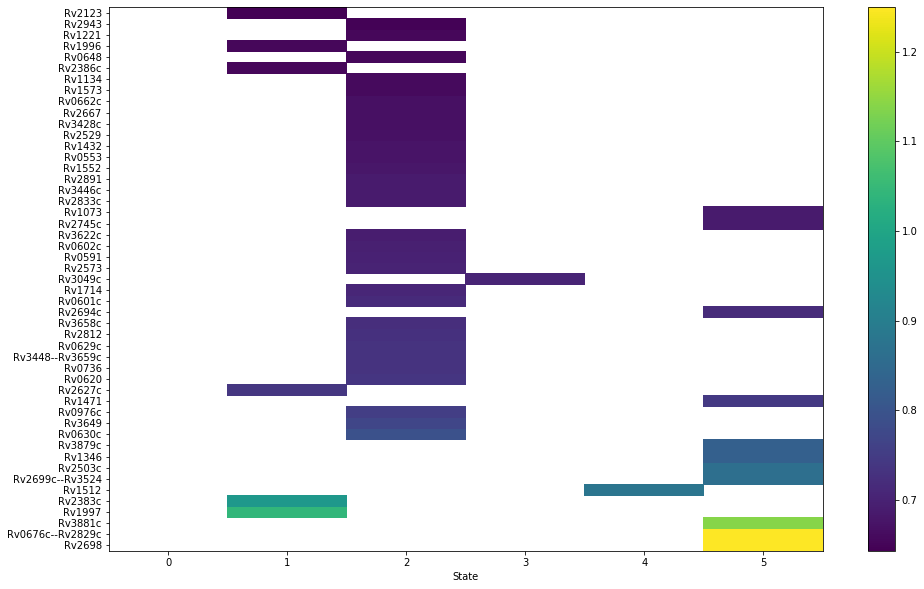

In [82]:
plotFeatureSignificanceByState(df=df)

In [77]:
10**(-0.1)

0.7943282347242815

In [59]:
df.loc["Rv0620", :]

0    0.000881
1    0.071400
2    0.736891
3    0.098856
4    0.002883
5    0.072546
Name: Rv0620, dtype: float64